In [1]:
#@title
from IPython.core.display import display, HTML
display(HTML('<h3 style="text-align: center;font-weight: normal;">========  COVID-19 Statistics Analysis  ==========</h3><p style="text-align: left;font-weight: normal;"> <strong>- COVID-19 Countries Statistics: <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries where the next Outbreak might be.  <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries Need to keep Control(current procedure) to dodge the outbreak. <br>&nbsp;&nbsp;&nbsp;&nbsp;- Countries Manage to Control The outbreak (Flatten the curve) in current procedures. </strong> </p>'))

In [ ]:
#@title
!git clone https://github.com/fadimasoud/C3.Grand_challeng.git

In [3]:
#@title
import ipywidgets as widgets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.core.display import display, HTML
import time
import datetime
from matplotlib.ticker import PercentFormatter
from IPython.display import Javascript
#prepare covid_19_data.csv data table
data_sum = pd.read_csv('/content/C3.Grand_challeng/covid_19_data.csv')
#group data based on country and date
data_s = data_sum.groupby(['ObservationDate','Country/Region']).sum()
data_s=data_s.reset_index(['ObservationDate','Country/Region'])
#correct ObservationDate type and create new columns if needed 
data_s['ObservationDate'] = pd.to_datetime(data_s['ObservationDate'])
data_s['day'] = data_s['ObservationDate'].dt.day
data_s['month'] = data_s['ObservationDate'].dt.month
data_s['Active']=data_s['Confirmed']-(data_s['Deaths']+data_s['Recovered'])
data_s['R+D']=data_s['Recovered']+data_s['Deaths']
#create a new table grouped by counties with final comulative cases 
data_c_p = data_s.groupby('Country/Region').max().reset_index(['Country/Region'])
# print('COVID-19_data.csv after preparing info:\n')
# data_s.info()
#@title
data_sum = pd.read_csv('/content/C3.Grand_challeng/covid_19_data.csv')
data_population = pd.read_csv('/content/C3.Grand_challeng/country_population.csv')
data_fertility = pd.read_csv('/content/C3.Grand_challeng/fertility_rate.csv')
data_life_exp = pd.read_csv('/content/C3.Grand_challeng/life_expectancy.csv')
data_temprature = pd.read_csv('/content/C3.Grand_challeng/temperature _monthly_data_per_country.csv')
data_curefews_dates = pd.read_csv('/content/C3.Grand_challeng/Curfews_and_lockdowns_countries_dates.csv')

# prepare data
#prepare covid_19_data.csv data table
#group data based on country and date
data_s = data_sum.groupby(['ObservationDate','Country/Region']).sum()
data_s=data_s.reset_index(['ObservationDate','Country/Region'])
#correct ObservationDate type and create new columns if needed 
data_s['ObservationDate'] = pd.to_datetime(data_s['ObservationDate'])
data_s['day'] = data_s['ObservationDate'].dt.day
data_s['month'] = data_s['ObservationDate'].dt.month
data_s['Active']=data_s['Confirmed']-(data_s['Deaths']+data_s['Recovered'])
data_s['R+D']=data_s['Recovered']+data_s['Deaths']
#create a new table grouped by counties with final comulative cases 
data_c_p = data_s.groupby('Country/Region').max().reset_index(['Country/Region'])
# print('COVID-19_data.csv after preparing info:\n')
# data_s.info()
#connect covid-19 data_c_p data with added column to population statistics
data_c_p['Country/Region'][data_c_p['Country/Region']=='Mainland China']='China'
data_c_p['Country/Region'][data_c_p['Country/Region']=="US"]="United States"
data_c_p['Country/Region'][data_c_p['Country/Region']=="UK"]="United Kingdom"
data_c_p['Country/Region'][data_c_p['Country/Region']=='Azerbaijan']='Azerbaijan'
data_c_p['Country/Region'][data_c_p['Country/Region']=="Hong Kong"]="Hong Kong SAR, China"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Iran"]="Iran, Islamic Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Macau"]="Macao SAR, China"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Russia"]="Russian Federation"
data_c_p['Country/Region'][data_c_p['Country/Region']=="South Korea"]="Korea, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Syria"]="Syrian Arab Republic"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Venezuela"]="Venezuela, RB"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Yemen"]="Yemen, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="Slovakia"]="Slovak Republic"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Saint Lucia"]="St. Lucia"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Saint Vincent and the Grenadines"]="St. Vincent and the Grenadines"
data_c_p['Country/Region'][data_c_p['Country/Region']=="North Macedonia"]="Macedonia, FYR"
data_c_p['Country/Region'][data_c_p['Country/Region']=="Republic of the Congo"]="Congo, Rep."
data_c_p['Country/Region'][data_c_p['Country/Region']=="('St. Martin',)"]='St. Martin (French part)'
data_c_p['Country/Region'][data_c_p['Country/Region']=="Egypt"]='Egypt, Arab Rep.'

data_p = data_population[['Country Name','2016']].copy()
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_p['Country Name'].loc[data_p['Country Name']==x].values:
        y.append(data_p['2016'].loc[data_p['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['population'] = y
data_c_p['population'].fillna(0,inplace=True)

#connect covid-19 data_c_p data with added column to fertility statistics
data_f = data_fertility[['Country Name','2016']].copy()
data_f['2016'].fillna(0,inplace=True)
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_f['Country Name'].loc[data_f['Country Name']==x].values:
        y.append(data_f['2016'].loc[data_f['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['fertility_rate'] = y
data_c_p['fertility_rate'].fillna(0,inplace=True)

#connect covid-19 data_c_p data with added column to life_exp statistics
data_l = data_life_exp[['Country Name','2016']].copy()
data_l['2016'].fillna(0,inplace=True)
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_l['Country Name'].loc[data_l['Country Name']==x].values:
        y.append(data_l['2016'].loc[data_l['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['life_exp'] = y

#connect covid-19 data_c_p data with added column to first quarter mean tempreture statistics
#choose only first 4 months data from temperature _monthly_data_per_country.csv to calculate the mean
data_t = data_temprature[['Jan_Temp', 'Feb_temp', 'Mar_temp', 'Apr_Temp']].transpose(copy=True)
y=[]
for x in data_t.columns:
    y.append(data_t[x].mean())
    
#create new DataFrame to save country with its mean first quarter tempreture
data_te = pd.DataFrame()    
data_te['Country Name'] = data_temprature['ISO_3DIGIT']
data_te['first_quarter_temp']=y

#convert country code to name
y=[]
for i,x in enumerate(data_te['Country Name']):
    if x == data_population['Country Code'].loc[data_population['Country Code']==x].values:
        y.append(data_population['Country Name'].loc[data_population['Country Code']==x].values[0])
    else:
        y.append(0)
data_te['Country Name'] = y

#connect covid-19 data_c_p data with added column to first quarter mean tempreture statistics
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_te['Country Name'].loc[data_te['Country Name']==x].values:
        y.append(data_te['first_quarter_temp'].loc[data_te['Country Name']==x].values[0])
    else:
        y.append(0)
data_c_p['first_quarter_temp'] = y

#add Curefews and Lockdown Start dates columns
data_curefew = data_curefews_dates[['Countries and territories','Start date']]
data_curefew.columns=['Countries', 'Start date']
data_curefew.dropna(inplace=True)
data_curefew.drop_duplicates(inplace=True)
data_curefew['Countries'][data_curefew['Countries']=='Russia']='Russian Federation'
data_curefew['Countries'][data_curefew['Countries']=='Venezuela']='Venezuela, RB'
y=[]
for i,x in enumerate(data_c_p['Country/Region']):
    if x == data_curefew['Countries'].loc[data_curefew['Countries']==x].values:
        y.append(data_curefew['Start date'].loc[data_curefew['Countries']==x].values[0])
    else:
        y.append('NAT')
data_c_p['Curefew_date'] = y
data_c_p['Curefew_date'] = pd.to_datetime(data_c_p['Curefew_date'])
for i, x in enumerate(data_c_p['Curefew_date'].tolist()):
    if x.month > 4:
        data_c_p['Curefew_date'].loc[i]=pd.to_datetime('%s%s%s'%(x.year, x.day, x.month), format='%Y%m%d')
data_c_p['Curefew_date'].fillna(0,inplace=True)


#
cols = ['D+R_percentage_of_A', 'Control_Level','Active']
More_than_700Cases_Countires = ['Mainland China','UK', 'US', 'Brazil', 'Italy','Japan','Russia', 'Spain', 'Sweden','Turkey', 'France', 'Germany','India','Canada', 'Australia', 'Austria', 'Belgium', 'Chile', 'Indonesia', 'Iran', 'Ireland', 'Malaysia', 'Mexico','Norway', 'Pakistan','Singapore', 'South Korea', 'Switzerland', 'Ukraine','Saudi Arabia','Kuwait','Lebanon','Egypt','Qatar','Bahrain','Jordan','Oman','Algeria','Tunisia','United Arab Emirates']
most_pop_country = [ 'Netherlands', 'Finland', 'Italy', 'Hungary', 'Taiwan', 'Tunisia','Denmark','Luxembourg', 'Sweden', 'Spain', 'Greece', 'Syria', 'France', 'South Sudan', 'Belgium', 'UK', 'Ireland', 'Republic of Ireland', 'Portugal', 'North Ireland','Niger', 'Norway','Vietnam','New Zealand','Paraguay','Morocco', 'Jordan', 'Egypt','Chile', 'Mexico','Mainland China', 'Germany', 'Bolivia', 'United Arab Emirates', 'Russia', 'Canada', 'Nigeria', 'Bahrain', 'Saudi Arabia','Iran', 'Qatar', 'Bosnia and Herzegovina','Israel', 'Switzerland','Austria', 'Kuwait', 'Oman','Hong Kong','Lebanon','Argentina', 'Algeria', 'India', 'US', 'Japan', 'Iraq', 'South Korea', 'Australia', 'Turkey', 'Cuba', 'Singapore', 'Malaysia', 'Poland','Brazil', 'Thailand']
countries_countrol_level = pd.DataFrame(columns=['Country','Control_Level'])
countries_countrol_level['Country']=data_s[data_s['Confirmed']>700].groupby('Country/Region').max().reset_index(['Country/Region'])['Country/Region']

more_control_countries = []
losing_control_countries = []

for country in most_pop_country:
    data = data_s[data_s['Country/Region']==country].groupby(['ObservationDate']).sum()
    data['D+R_percentage_of_A']=((data['Deaths']+data['Recovered'])/data['Active'])*100
    data['A_Divided_on_D+R']=data['Active']/(data['Deaths']+data['Recovered'])
    data['A_Divided_on_D+R'] = ((data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)] -  data['A_Divided_on_D+R'].min()) / (data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)].max() - data['A_Divided_on_D+R'].min()))*100
    data['Control_Level'] = ((((((data['Active'] - data['R+D'])-(data['Active'] - data['R+D']).min())/((data['Active'] - data['R+D']).max()-(data['Active'] - data['R+D']).min()))*100)-100)*(-1))
    #data['growth_rate_of_control'] = growth_rate(data['Control_Level'])*100
    if data_c_p['Curefew_date'].loc[data_c_p['Country/Region']==country].values:
        Cdd = data_c_p['Curefew_date'].loc[data_c_p['Country/Region']==country].values[0]
        Cdd = pd.to_datetime(Cdd)
        datetime.datetime.timestamp(Cdd)
    else:
        Cdd = 0
    first_case = data['Confirmed'].ne(0).idxmax().date()
    if data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']<1000000)].max()>=100:
        first_controled_date = data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']>=100)&(data['D+R_percentage_of_A']<1000000)].index[0].date()
        #controled_level = 100.0
        if data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].max()>0:
            lose_control_date = data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].index[0].date()
            #controled_level = np.round(data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].describe()[-2],0)
            if data['D+R_percentage_of_A'].loc[lose_control_date:,][(data['D+R_percentage_of_A']>100)].max()>0:
                second_controled_date = data['D+R_percentage_of_A'].loc[lose_control_date:,][(data['D+R_percentage_of_A']>100)].index[0].date()
                #controled_level = 100.0
            else:
                second_controled_date = 'None'
        else:
            lose_control_date = 'Still under Control'
            second_controled_date = 'None'
    else:
        first_controled_date = 'Not yet'
        lose_control_date = 'None'
        second_controled_date = 'None'
        #controled_level = np.round((((data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']<1000000)]) / 100)*100).max(),0)
    controled_level = np.round(data['Control_Level'].tail(n=10).describe()[1],1)
    countries_countrol_level['Control_Level'][countries_countrol_level['Country']==country]=controled_level
    if np.round(data['Control_Level'].tail(n=3).describe()[1],1) - np.round(data['Control_Level'].tail(n=10).describe()[1],1) >= 0:
        control_direction = 'More Control'
        more_control_countries.append(country)
    else:
        control_direction = 'Losing Control'
        losing_control_countries.append(country)

countries_controled_the_outbreak = countries_countrol_level['Country'][countries_countrol_level['Control_Level']>=80].tolist()
countries_near_controling = countries_countrol_level['Country'][(countries_countrol_level['Control_Level']>40)&(countries_countrol_level['Control_Level']<80)].tolist()
next_possible_outbreak_countries = countries_countrol_level['Country'][countries_countrol_level['Control_Level']<=40].tolist()


display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Summary: </strong> (more details on graphs below) <br></h3>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Countries Losing Control of the Outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(losing_control_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Countries Manage more Control of the Outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(more_control_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  ============= <br></h3>'))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Countries where the next Outbreak might be:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(next_possible_outbreak_countries)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Countries Need to keep Control(current procedure) to dodge the outbreak:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br> </p>'%(countries_near_controling)))
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Countries Manage to Control The out break (Flatten the curve) in current procedures:</strong>  <br></h3><p style="text-align: center;font-weight: normal;"><strong> %s </strong><br><br><br><br> </p>'%(countries_controled_the_outbreak)))


<IPython.core.display.Javascript object>

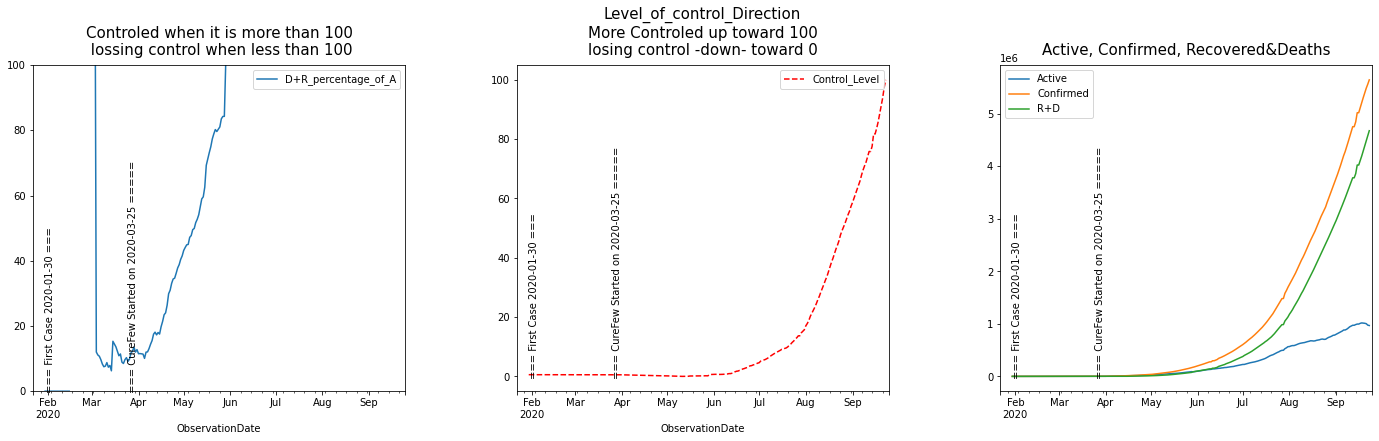

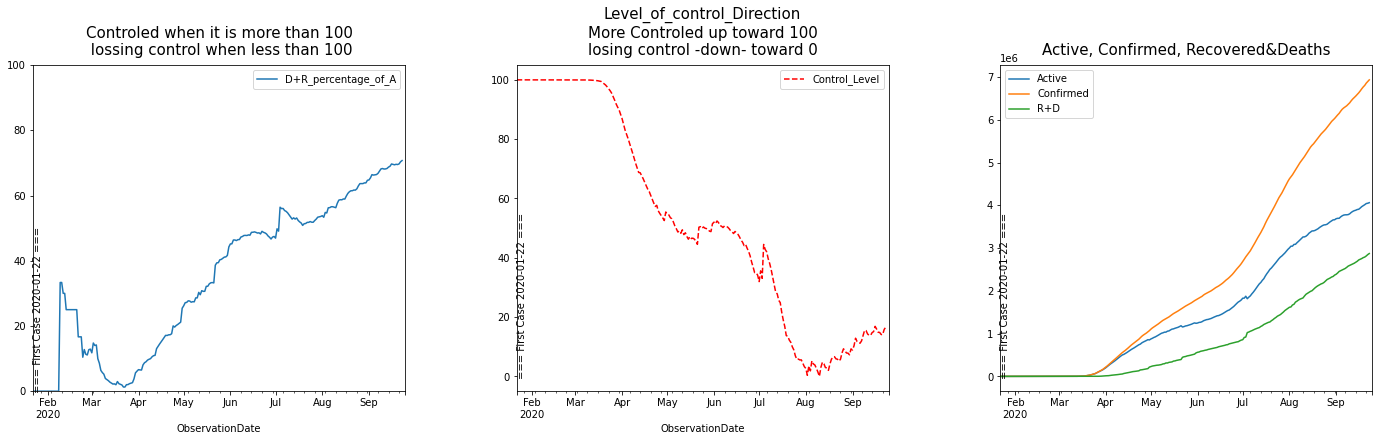

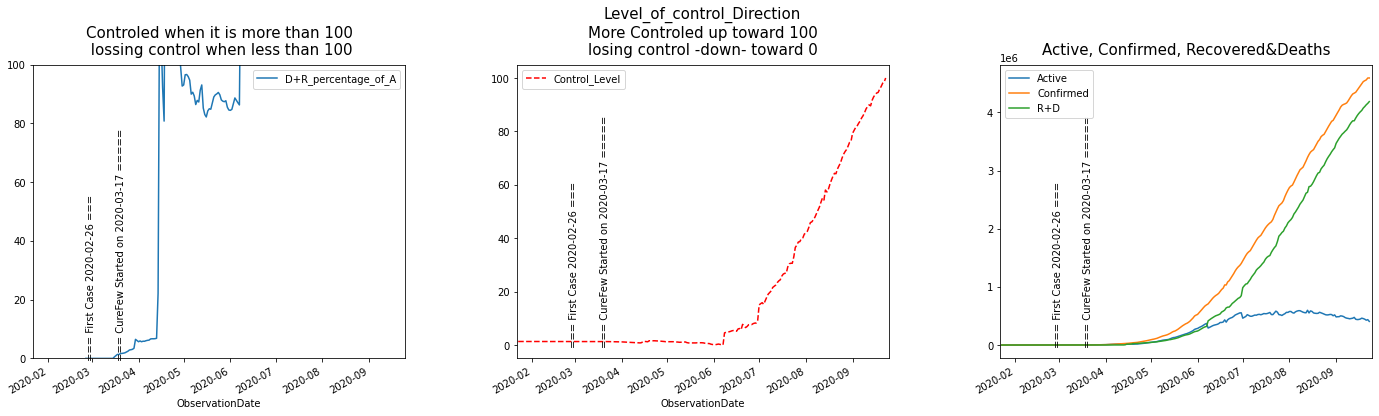

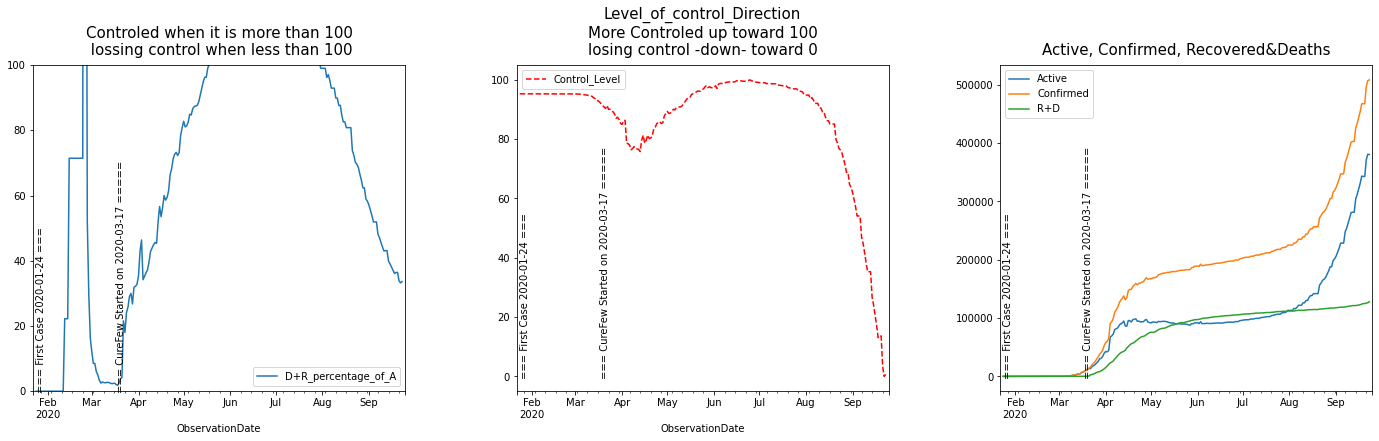

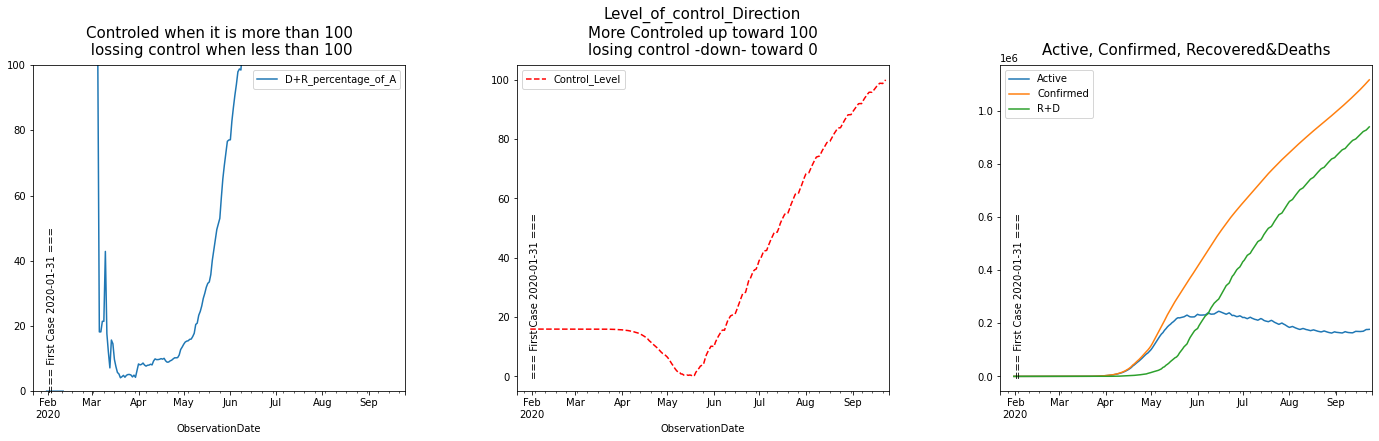

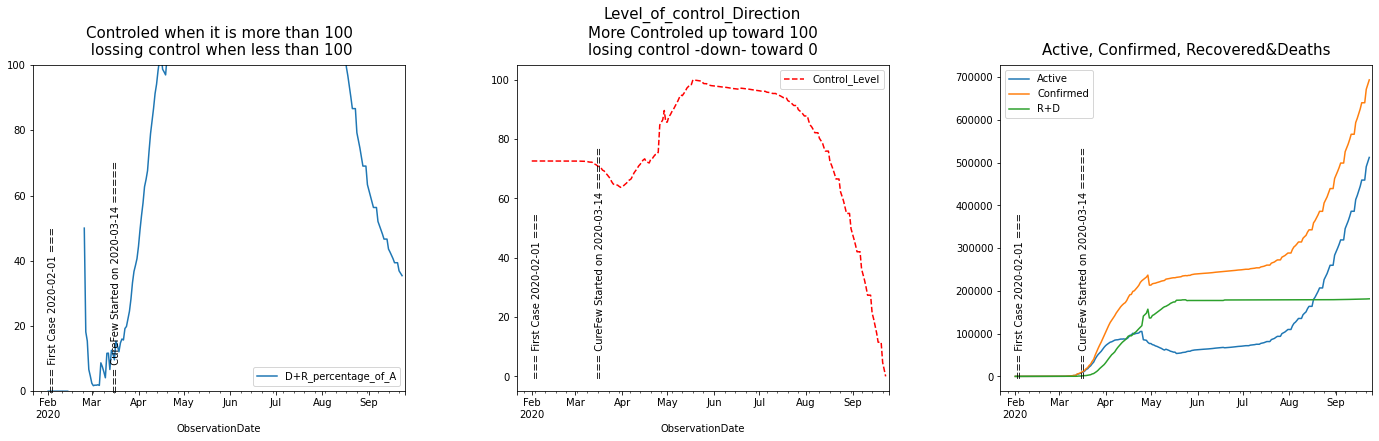

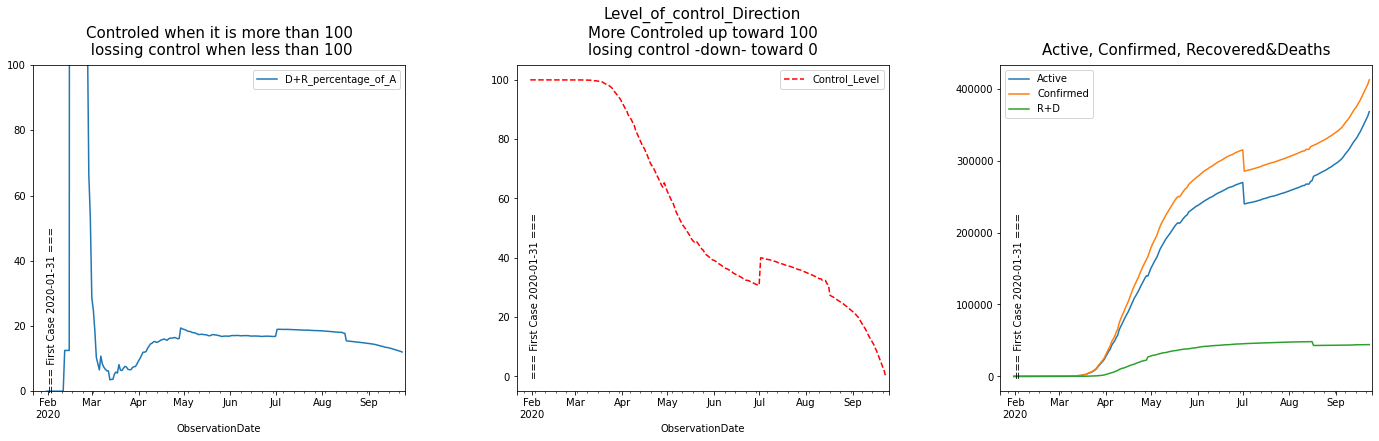

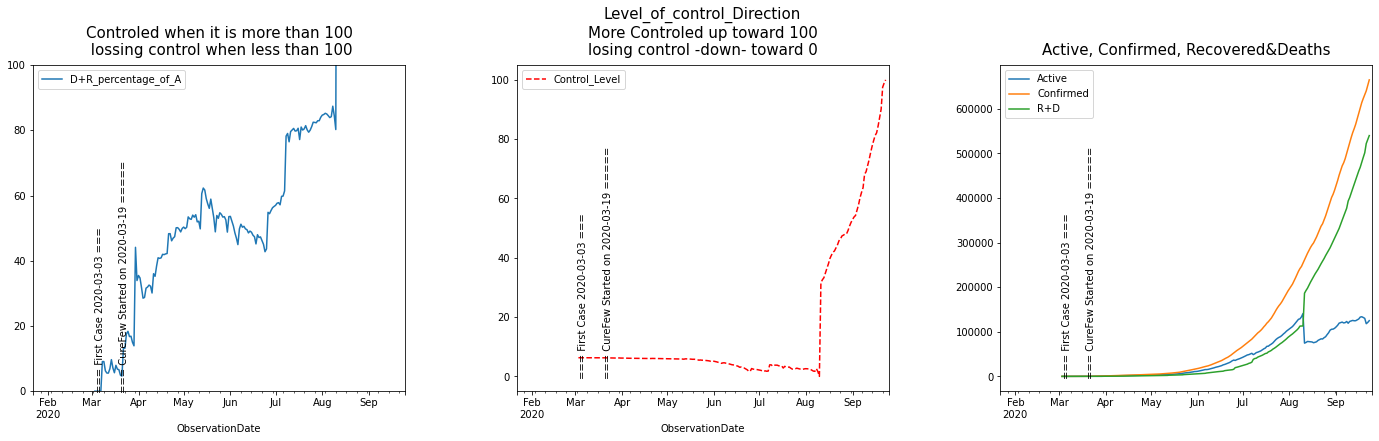

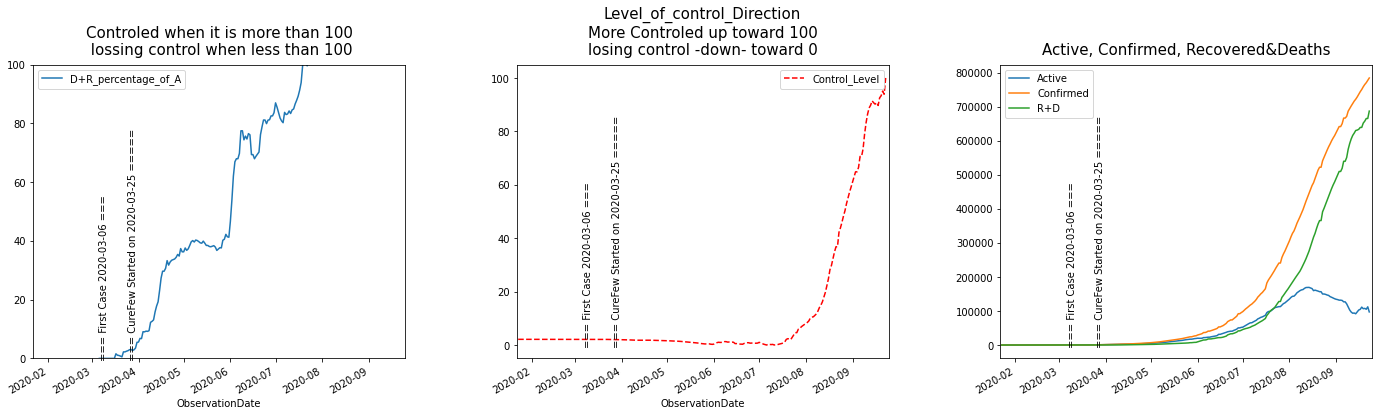

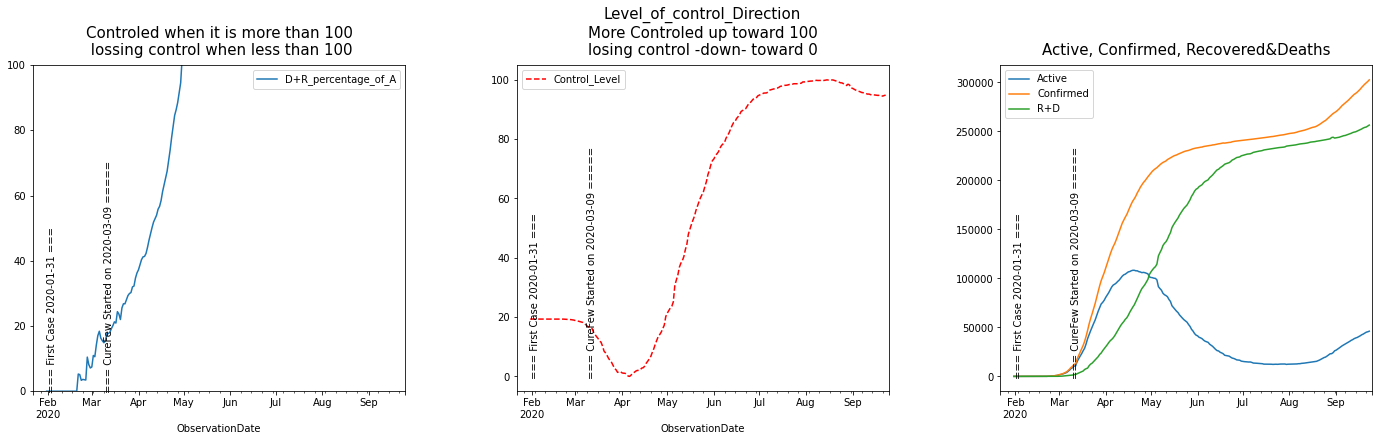

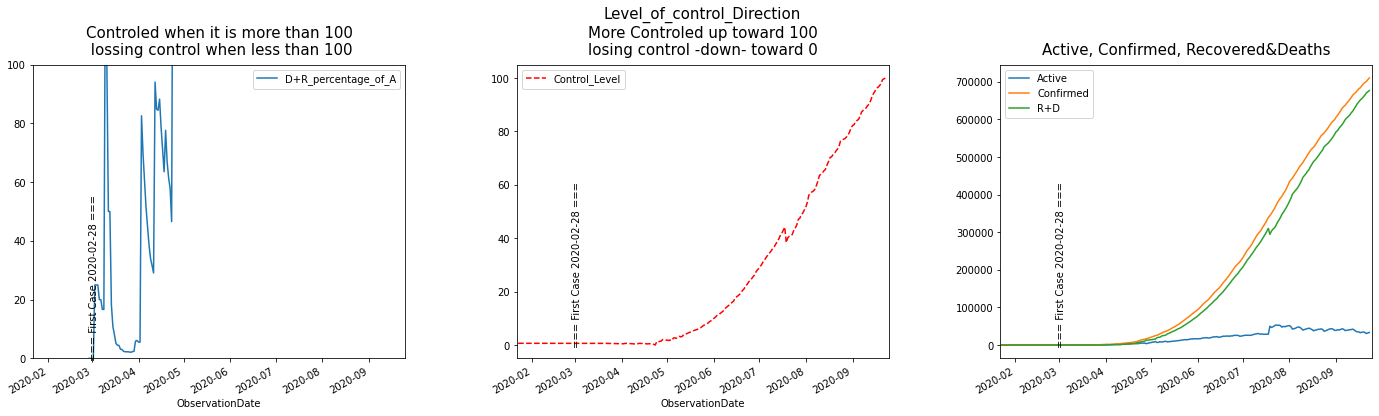

In [9]:
#@title
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 50000})'''))
cols = ['D+R_percentage_of_A', 'Control_Level','Active']
Imp_countries = ['Mainland China', 'Italy', 'Spain', 'Germany','France', 'US', 'UK','Turkey', 'Canada', 'Israel', 'Sweden','Russia', 'India']
chosen_country = ['India', 'US', 'Brazil','France','Russia', 'Spain', 'UK', 'Argentina', 'Colombia', 'Italy',  'Mexico']
display(HTML('<h3 style="text-align: left;font-weight: normal;color:#33397d;">  <strong>Deatailed Graph: </strong><br></h3>'))

more_control_countries = []
losing_control_countries = []

for country in chosen_country:
    data = data_s[data_s['Country/Region']==country].groupby(['ObservationDate']).sum()
    data['D+R_percentage_of_A']=((data['Deaths']+data['Recovered'])/data['Active'])*100
    data['A_Divided_on_D+R']=data['Active']/(data['Deaths']+data['Recovered'])
    data['A_Divided_on_D+R'] = ((data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)] -  data['A_Divided_on_D+R'].min()) / (data['A_Divided_on_D+R'][(data['A_Divided_on_D+R']<1000000)].max() - data['A_Divided_on_D+R'].min()))*100
    data['Control_Level'] = ((((((data['Active'] - data['R+D'])-(data['Active'] - data['R+D']).min())/((data['Active'] - data['R+D']).max()-(data['Active'] - data['R+D']).min()))*100)-100)*(-1))
    #data['growth_rate_of_control'] = growth_rate(data['Control_Level'])*100
    if data_c_p['Curefew_date'].loc[data_c_p['Country/Region']==country].values:
        Cdd = data_c_p['Curefew_date'].loc[data_c_p['Country/Region']==country].values[0]
        Cdd = pd.to_datetime(Cdd)
        datetime.datetime.timestamp(Cdd)
    else:
        Cdd = 0
    first_case = data['Confirmed'].ne(0).idxmax().date()
    if data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']<1000000)].max()>=100:
        first_controled_date = data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']>=100)&(data['D+R_percentage_of_A']<1000000)].index[0].date()
        #controled_level = 100.0
        if data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].max()>0:
            lose_control_date = data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].index[0].date()
            #controled_level = np.round(data['D+R_percentage_of_A'].loc[first_controled_date:,][(data['D+R_percentage_of_A']<90)].describe()[-2],0)
            if data['D+R_percentage_of_A'].loc[lose_control_date:,][(data['D+R_percentage_of_A']>100)].max()>0:
                second_controled_date = data['D+R_percentage_of_A'].loc[lose_control_date:,][(data['D+R_percentage_of_A']>100)].index[0].date()
                #controled_level = 100.0
            else:
                second_controled_date = 'None'
        else:
            lose_control_date = 'Still under Control'
            second_controled_date = 'None'
    else:
        first_controled_date = 'Not yet'
        lose_control_date = 'None'
        second_controled_date = 'None'
        #controled_level = np.round((((data['D+R_percentage_of_A'][(data['D+R_percentage_of_A']<1000000)]) / 100)*100).max(),0)
    controled_level = np.round(data['Control_Level'].tail(n=10).describe()[1],1)
    countries_countrol_level['Control_Level'][countries_countrol_level['Country']==country]=controled_level
    if np.round(data['Control_Level'].tail(n=3).describe()[1],1) - np.round(data['Control_Level'].tail(n=10).describe()[1],1) >= 0:
        control_direction = 'More Control'
        more_control_countries.append(country)
    else:
        control_direction = 'Losing Control'
        losing_control_countries.append(country)
        
    plt.figure(figsize=(24,6))
    plt.subplots_adjust(hspace = 0.5,wspace=0.3)
    display(HTML('<h3 style="text-align: center;font-weight: normal;"> ======== <strong>%s</strong> ======== Current status: <strong>%s</strong> ======== <br></h3><p style="text-align: center;font-weight: normal;"> First case on <strong>%s</strong>   &nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;    First Controled on: <strong>%s</strong>   &nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;  Lost Control on: <strong>%s</strong> <br>             Second controled on: <strong>%s</strong>     &nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;        Control level: <strong>%s%s</strong><br>&nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;        Current status: <strong>%s</strong><br> </p>'% (country,control_direction,first_case,first_controled_date,lose_control_date,second_controled_date,controled_level,'%',control_direction)))
    plt.tight_layout()
    for ix, column in enumerate(cols):
        plt.subplot(1, 3, ix+1)       
        if ix+1==3:
            data['Active'].plot()
            data['Confirmed'].plot()
            data['R+D'].plot()
            plt.xlabel('').set_visible(False)
            plt.title('Active, Confirmed, Recovered&Deaths', fontsize=15,pad=10)
            plt.legend()
        elif ix+1==2:
            #plt.setp(plt.subplot(1, 3, ix+1), ylim=(0, 110))
            data[column].plot(legend=True,style='r--')#.get_xaxis().set_visible(False)            
            plt.title('Level_of_control_Direction\nMore Controled up toward 100\nlosing control -down- toward 0', fontsize=15,pad=10)
        else:
            plt.setp(plt.subplot(1, 3, ix+1), ylim=(0, 100))
            data[column].plot(legend=True)#.get_xaxis().set_visible(False)
            plt.title('Controled when it is more than 100\n lossing control when less than 100', fontsize=15,pad=10)
        plt.setp(plt.subplot(1, 3, ix+1), xlim=(data_s['ObservationDate'][0].date(), (data_s['ObservationDate'].loc[data_s['ObservationDate'].index[-1]]+np.timedelta64(2, 'D')).date()))
        plt.text(first_case, 0, '=== First Case %s ==='%first_case,rotation=90,fontsize=10)
        if Cdd!=0:
            plt.text(Cdd.date(), 0, '=== CureFew Started on %s ====='%Cdd.date(),rotation=90,fontsize=10)
    plt.show()